# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

1) Finding the average order value is not an accurate representation of typical customer spending because the high outliers of people purchasing bulk orders will positively skew the data. For example, on line 62, someone ordered $70k worth of stuff.

2) A better metric to use would be the median of the data because the median is another form of an average that isnt effected by outliers. The median order value is 284

3) after removing high outliers and looking at customer spending under $1000, The LSRL line is pretty consistent throughout the month, so we can assume that there no relationship between time of month and typical customer purchasing



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")
AOV = df['order_value'].mean()
print(AOV)
print(df['order_value'].median())





3145.128
284.0


/var/folders/69/yp2cj97n2wgfw67f9htzglpw0000gn/T/ipykernel_74524/2569648034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])


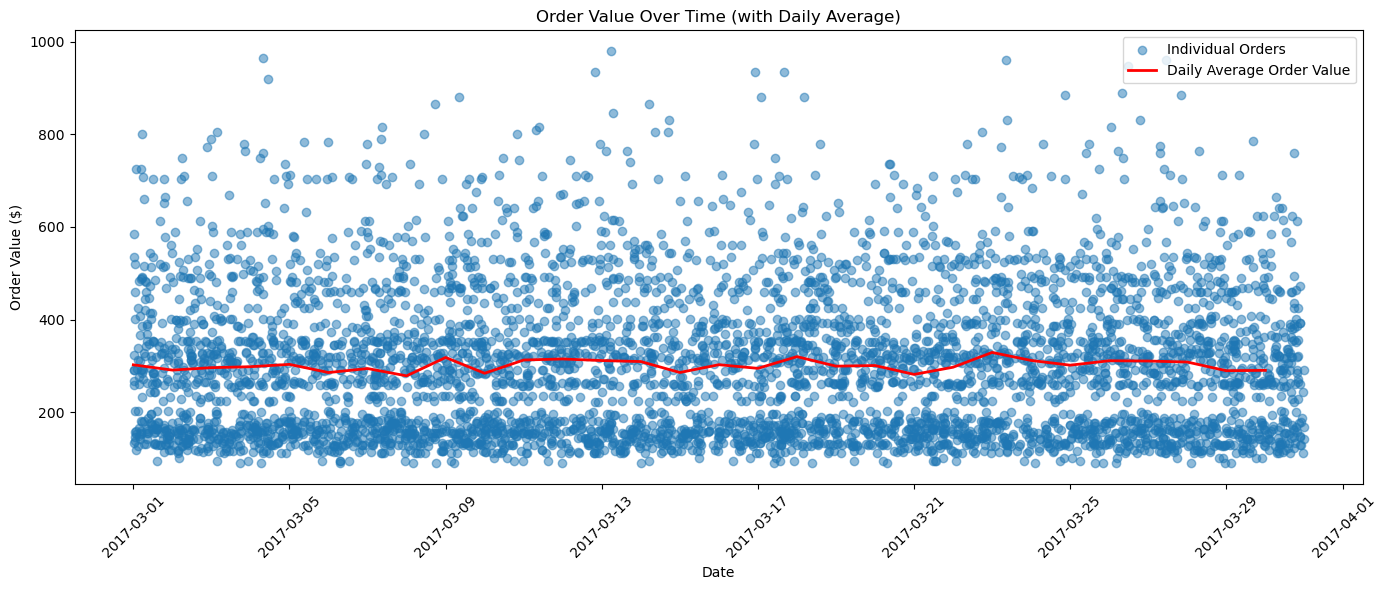

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure created_at is datetime
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])

# 2. Set up daily average order value
daily_avg = filtered_df.groupby(filtered_df['created_at'].dt.date)['order_value'].mean()

# 3. Create the plot
plt.figure(figsize=(14, 6))

# Scatter plot of individual orders
plt.scatter(filtered_df['created_at'], filtered_df['order_value'], alpha=0.5, label='Individual Orders')

# Line plot of daily average
plt.plot(daily_avg.index, daily_avg.values, color='red', linewidth=2, label='Daily Average Order Value')

# Formatting
plt.title('Order Value Over Time (with Daily Average)')
plt.xlabel('Date')
plt.ylabel('Order Value ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
